<a href="https://colab.research.google.com/github/rodolfo-lab/mascaras/blob/main/carro_segue_faixa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


imagem e o caminho dela dentro dos parênteses em cv2.imread("") (linha 7)

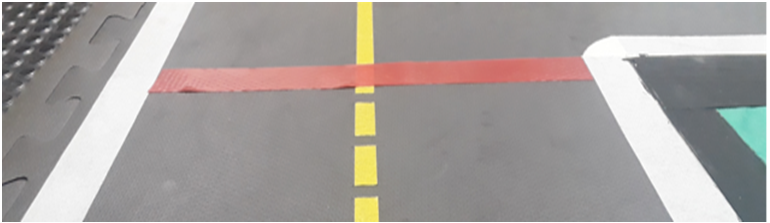

In [ ]:
#imagem utilizada
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/drive/MyDrive/imagem carro/20190909_151751.png")

cv2_imshow(img)


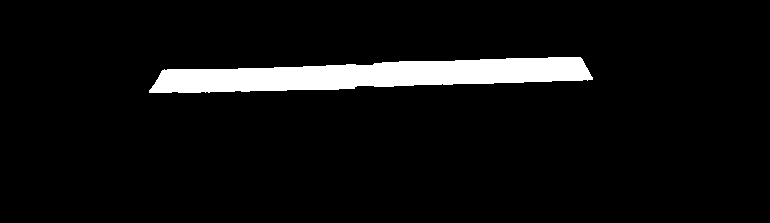

In [ ]:
#MASCARA PARA O VERMELHO
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/imagem carro/20190909_151751.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
rangeMin = np.array([0, 50, 50], np.uint8)
rangeMax = np.array([10, 255, 255], np.uint8)
mask1 = cv2.inRange(hsv, rangeMin, rangeMax)
    
rangemin = np.array([160, 50, 50], np.uint8)
rangemax = np.array([180, 255, 255], np.uint8)
mask2 = cv2.inRange(hsv, rangemin, rangemax)
    
mask= mask1+mask2
cv2_imshow(mask)



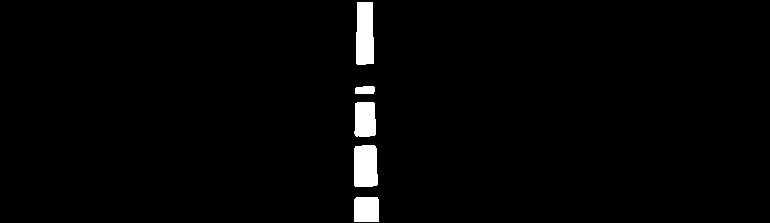

In [ ]:
#MASCARA PARA O AMARELO
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/imagem carro/20190909_151751.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
low_yellow = np.array([15, 52, 132], dtype = "uint8")
up_yellow = np.array([50, 255, 255], dtype = "uint8")
mask_yellow = cv2.inRange(hsv, low_yellow, up_yellow)
cv2_imshow(mask_yellow)


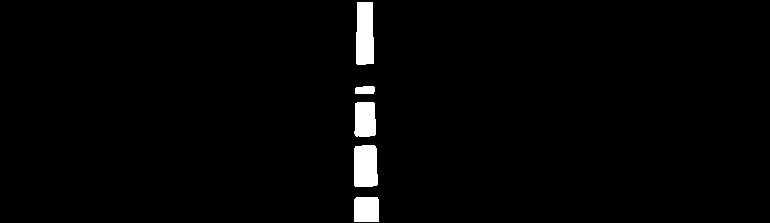

In [ ]:
##MASCARA PARA O AMARELO(dentro do cadigo do para o calculo dos contornos)
import cv2
import numpy as np
import matplotlib.pyplot as plt  

AreaContornoLimiteMin = 750
img = cv2.imread("/content/drive/MyDrive/imagem carro/20190909_151751.png")
  
height = np.size(img,0)
width= np.size(img,1)
QtdeContornos = 0

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
low_yellow = np.array([15, 52, 132], dtype = "uint8")
up_yellow = np.array([50, 255, 255], dtype = "uint8")   
mask_yellow = cv2.inRange(hsv, low_yellow, up_yellow)   
cv2_imshow(mask_yellow)



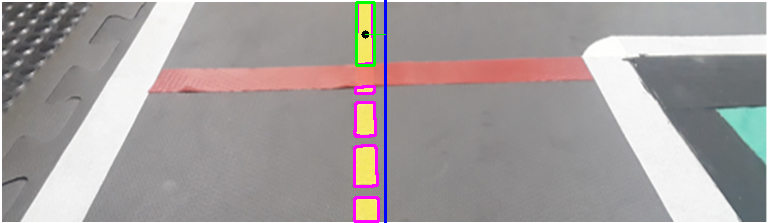

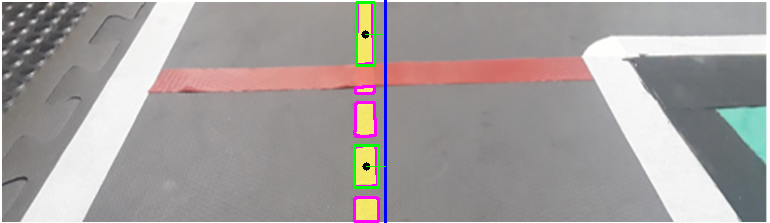

In [ ]:
#CALCULO DOS CONTORNOS E DISTANCIA DO EIXO DE REFERENCIA
cv2.waitKey(1)
    
cnts, hierarchy, = cv2.findContours(mask_yellow.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,cnts,-1,(255,0,255),2)
    
cnts.reverse()
for c in cnts:
        
  if cv2.contourArea(c) < AreaContornoLimiteMin:
    continue         
  QtdeContornos = QtdeContornos + 1   
  (x, y, w, h) = cv2.boundingRect(c)                                             
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
  CoordenadaXCentroContorno = round((x+x+w)/2)
  CoordenadaYCentroContorno = round((y+y+h)/2)  
  PontoCentralContorno = (CoordenadaXCentroContorno,CoordenadaYCentroContorno)
  cv2.circle(img, PontoCentralContorno, 1, (0, 0, 0), 5)

  cv2.line(img,(round(width/2),0),(round(width/2),round(height)),(255,0,0),2)
     
  if (QtdeContornos > 0):
    cv2.line(img,PontoCentralContorno,(round(width/2),CoordenadaYCentroContorno),(0,255,0),1)
    cv2_imshow(img)
  

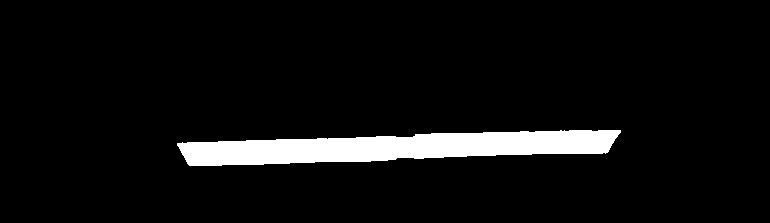

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  

areaContorno_LimiteMinimo = 5

img = cv2.imread("/content/drive/MyDrive/imagem carro/20190909_151751.png")

height = np.size(img,0)
width= np.size(img,1)
qtdContornos = 0
valorAjuste = 0

     
    #tratamento da imagem
img = cv2.flip(img, -1)
#img = img[:115,:]
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
rangeMin = np.array([0, 50, 50], np.uint8)
rangeMax = np.array([10, 255, 255], np.uint8)
mask1 = cv2.inRange(hsv, rangeMin, rangeMax)
    
rangemin = np.array([160, 50, 50], np.uint8)
rangemax = np.array([180, 255, 255], np.uint8)
mask2 = cv2.inRange(hsv, rangemin, rangemax)

mask= mask1+mask2
cv2_imshow(mask)
    


In [ ]:
#codigo
import cv2
import numpy as np
import RPi.GPIO as GPIO
import time


#-------------------------------
# CONSTANTES E VARIAVEIS GLOBAIS
#-------------------------------
limiarBinarizacao = 127         
areaContorno_LimiteMinimo = 5

#PID
kd = 0.6 #0.8
kp = 1.3 #1
ki = 0.001
lastError = 0
totalError = 0

statusParada = 0



#------------------------------
# BLOCO DE METODOS  -----------
#------------------------------
camera = cv2.VideoCapture(0)
camera.set(3,320)
camera.set(4,240)
    
    
def setupGPIO():
    global motorDireito
    global motorEsquerdo
    global velocidade_motorA
    global velocidade_motorB
    
    GPIO.setwarnings(False)
    GPIO.setmode(GPIO.BOARD)

    GPIO.setup(7, GPIO.OUT)
    GPIO.setup(11, GPIO.IN)

    GPIO.setup(33, GPIO.OUT)
    motorDireito = GPIO.PWM(33, 100)
    GPIO.setup(31, GPIO.OUT)
    GPIO.setup(29, GPIO.OUT)

    GPIO.setup(32, GPIO.OUT)
    motorEsquerdo = GPIO.PWM(32, 100)
    GPIO.setup(35, GPIO.OUT)
    GPIO.setup(36, GPIO.OUT)

    motorDireito.start(0)
    motorEsquerdo.start(0)
    
    velocidade_motorA = 60
    velocidade_motorB = 60

def trataImagem(img):
    height = np.size(img,0)
    width= np.size(img,1)
    qtdContornos = 0
    valorAjuste = 0
     
    #tratamento da imagem
    img = cv2.flip(img, -1)
    img = img[:115,:]
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    rangeMin = np.array([0, 50, 50], np.uint8)
    rangeMax = np.array([10, 255, 255], np.uint8)
    mask1 = cv2.inRange(hsv, rangeMin, rangeMax)
    
    rangemin = np.array([160, 50, 50], np.uint8)
    rangemax = np.array([180, 255, 255], np.uint8)
    mask2 = cv2.inRange(hsv, rangemin, rangemax)
    
    mask= mask1+mask2
    #cv2.imshow('vermelho', mask)
    
    conts, _, = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #cnts = imutils.grab_contours(cnts)
    conts = sorted(conts, key = cv2.contourArea, reverse = True)[:1]
    areas = []
    for c in conts:
        areas.append(cv2.contourArea(c))
    areaFaixaVermelha = np.asarray(areas)
    #print (areaFaixaVermelha)
    #areaFaixaVermelha = map(int, areas)  
    low_yellow = np.array([15, 52, 132], dtype = "uint8")
    up_yellow = np.array([50, 255, 255], dtype = "uint8")
     
    mask_yellow = cv2.inRange(hsv, low_yellow, up_yellow)
    
    #cv2.imshow('F.B.',mask_yellow)
 
    cnts, hierarchy, = cv2.findContours(mask_yellow.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img,cnts,-1,(255,0,255),2)
    


    cnts.reverse()
    for c in cnts:
        #se a area do contorno capturado for pequena, nada acontece
        if cv2.contourArea(c) < areaContorno_LimiteMinimo:
           continue
             
        qtdContornos = qtdContornos + 1
 
        

        (x, y, w, h) = cv2.boundingRect(c)   #x e y: coordenadas do vertice superior esquerdo
                                             #w e h: respectivamente largura e altura do retangulo
 
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
        CoordenadaXCentroContorno = (x+x+w)/2
        CoordenadaYCentroContorno = (y+y+h)/2
        PontoCentralContorno = (CoordenadaXCentroContorno,CoordenadaYCentroContorno)
        cv2.circle(img, PontoCentralContorno, 1, (0, 0, 0), 5)
         
        valorAjuste = CoordenadaXCentroContorno - (width/2) + 83  #em relacao a linha central
      

        cv2.line(img,(width/2,0),(width/2,height),(255,0,0),2)
     
        if (qtdContornos > 0):
           cv2.line(img,PontoCentralContorno,(width/2,CoordenadaYCentroContorno),(0,255,0),1)
    

        #cv2.imshow('Analise de rota',img)
        
    return valorAjuste, qtdContornos, areaFaixaVermelha



def verificarParada(areaFaixaVermelha):
    global motorDireito
    global motorEsquerdo
    global velocidade_motorA
    global velocidade_motorB
    global statusParada
    global valorParada
    
    
    if (statusParada == 0 and areaFaixaVermelha >= 1500): 
          #desativa motores
          motorDireito.ChangeDutyCycle(0)
          motorEsquerdo.ChangeDutyCycle(0)
          time.sleep(4)
          #reativa motores
          motorDireito.ChangeDutyCycle(velocidade_motorA)
          motorEsquerdo.ChangeDutyCycle(velocidade_motorB)
          statusParada = 1
          
    elif(statusParada == 1 and areaFaixaVermelha < 100): #aguarda saida da faixa
          statusParada = 0
              
              

def PID(valorAjuste):
    global velocidade_motorA
    global velocidade_motorB
    global motorDireito
    global motorEsquerdo
    global kd
    global kp
    global ki
    global error
    global totalError
    global lastError
    
    
    if (valorAjuste <> 0):
        #print ("Distancia da linha de referencia: "+str(abs(valorAjuste))+" pixels a direita")
        error = valorAjuste
        totalError = totalError + error
        
        proporcional = kp * error
        derivada = kd * (error - lastError)
        integral = ki * totalError
      
        velocidade_motorA = 60 - proporcional - integral - derivada
        velocidade_motorB = 60 + proporcional + integral + derivada
        lastError = error
      
      #correcao velocidade  
        if(velocidade_motorA > 100):
            velocidade_motorA = 100
        elif(velocidade_motorA < 10):
            velocidade_motorA = 10

        if(velocidade_motorB > 100):
            velocidade_motorB = 100
        elif(velocidade_motorB < 10):
            velocidade_motorB = 10
          

        motorDireito.ChangeDutyCycle(velocidade_motorA)
        motorEsquerdo.ChangeDutyCycle(velocidade_motorB)
        GPIO.output(31, GPIO.LOW)
        GPIO.output(29, GPIO.HIGH)
        GPIO.output(35, GPIO.HIGH)
        GPIO.output(36, GPIO.LOW)
        
        
def verificaTrajeto(faixaAmarela):
    if(faixaAmarela == False):
        GPIO.output(31, GPIO.LOW)
        GPIO.output(29, GPIO.LOW)
        GPIO.output(35, GPIO.LOW)
        GPIO.output(36, GPIO.LOW)


def Sensor():          
      

    GPIO.output(7, GPIO.LOW)

      #print (" Aguardando o sensor estabilizar")

    time.sleep(0.0001)

      #print (" Cálculo de distância ")
      
    GPIO.output(7, GPIO.HIGH)
      
    pulse_end_time = time.time()
    pulse_start_time = time.time()
    time.sleep(0.00001)

    GPIO.output(7, GPIO.LOW)

      while GPIO.input(11)==0:
            pulse_start_time = time.time()
      while GPIO.input(11)==1:
            pulse_end_time = time.time()
      #print "Distance:",SensorParada ,"cm"
      pulse_duration = pulse_end_time - pulse_start_time
      SensorParada = round(pulse_duration * 17150, 2)
      if(SensorParada < 5)
	      motorDireito.ChangeDutyCycle(0)
          motorEsquerdo.ChangeDutyCycle(0)
          time.sleep(4)
          #reativa motores
          motorDireito.ChangeDutyCycle(velocidade_motorA)
          motorEsquerdo.ChangeDutyCycle(velocidade_motorB)
      #print "Distance:",distance,"cm"

	
#------------------------------
#  PROGRAMA PRINCIPAL  --------
#------------------------------
setupGPIO()

while True:
      (grabbed, frame) = camera.read()
     
      if(grabbed):
          valorAjuste,faixaAmarela,areaFaixaVermelha = trataImagem(frame)
          Sensor()
          PID(valorAjuste)
          verificarParada(areaFaixaVermelha)
          verificaTrajeto(faixaAmarela)   
 
exit(1)  




In [ ]:
#codigo antigo
import cv2
import numpy as np
import RPi.GPIO as GPIO
import matplotlib.pyplot as plt
LimiarBinarizacao = 127       #este valor eh empirico. Ajuste-o conforme sua necessidade 
AreaContornoLimiteMin = 10  #este valor eh empirico. Ajuste-o conforme sua necessidade 
 

 

def TrataImagem(img):
    
    #obtencao das dimensoes da imagem
    height = np.size(img,0)
    width= np.size(img,1)
    QtdeContornos = 0
    DirecaoASerTomada = 0
     
    #tratamento da imagem
    Areamin = 1300
  
    img = cv2.flip(img, -1)
    img = img[:120,:]
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    #Mascara para o vermelho é feito duas mascaras devido a peculiaridade da cor vermelha
    rangeMin = np.array([0, 50, 50], np.uint8)
    rangeMax = np.array([10, 255, 255], np.uint8)
    mask1 = cv2.inRange(hsv, rangeMin, rang	eMax)
    
    rangemin = np.array([160, 50, 50], np.uint8)
    rangemax = np.array([180, 255, 255], np.uint8)
    mask2 = cv2.inRange(hsv, rangemin, rangemax)
    
    mask= mask1+mask2
    #desmarcar a linha abaixo para mostrar a mascara do vermelho
    #cv2.imshow('vermelho', mask)
    
    #area do contorno para o vermelho (areacalc é a area para o contorno do vermelho)
    conts, _, = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #cnts = imutils.grab_contours(cnts)
    conts = sorted(conts, key = cv2.contourArea, reverse = True)[:1]
    areas = []
    for c in conts:
        areas.append(cv2.contourArea(c))
    Areacalc = np.asarray(areas)
    #print (Areacalc)
    #Areacalc = map(int, areas)
  
    #mascara para o amarelo
    low_yellow = np.array([15, 52, 132], dtype = "uint8")
    up_yellow = np.array([50, 255, 255], dtype = "uint8")
     

    mask_yellow = cv2.inRange(hsv, low_yellow, up_yellow)
    

    #cv2.imshow('F.B.',mask_yellow)
    cv2.waitKey(1)
    
    #area de contorno para o amarelo
    cnts, hierarchy, = cv2.findContours(mask_yellow.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img,cnts,-1,(255,0,255),2)
    


    cnts.reverse()
    for c in cnts:
        #se a area do contorno capturado for pequena, nada acontece
        if cv2.contourArea(c) < AreaContornoLimiteMin:
           continue
             
        QtdeContornos = QtdeContornos + 1
        
	#obtem coordenadas do contorno (na verdade, de um retangulo que consegue abrangir todo ocontorno) e realca o contorno com um retangulo.
        # coordenadas para o contorno( um retangulo )
        (x, y, w, h) = cv2.boundingRect(c)   #x e y: coordenadas do vertice superior esquerdo
                                             #w e h: respectivamente largura e altura do retangulo
 
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
	#determina o ponto central do contorno e desenha um circulo para indicar
        CoordenadaXCentroContorno = (x+x+w)/2
        CoordenadaYCentroContorno = (y+y+h)/2
        PontoCentralContorno = (CoordenadaXCentroContorno,CoordenadaYCentroContorno)
        cv2.circle(img, PontoCentralContorno, 1, (0, 0, 0), 5)
         
        DirecaoASerTomada = CoordenadaXCentroContorno - (width/2) + 90  #em relacao a linha central
      
	#output da imagem
        #linha em azul: linha central / referencia
        #linha em verde: linha que mostra distancia entre linha e a referencia
        cv2.line(img,(width/2,0),(width/2,height),(255,0,0),2)
     
        if (QtdeContornos > 0):
           cv2.line(img,PontoCentralContorno,(width/2,CoordenadaYCentroContorno),(0,255,0),1)
    

        #cv2.imshow('Analise de rota',img)
        cv2.waitKey(1)
        
    return DirecaoASerTomada, QtdeContornos, Areamin, Areacalc



#Programa principal
 
#Setup dos GPIOs
GPIO.setwarnings(False)
GPIO.setmode(GPIO.BOARD)

GPIO.setup(33, GPIO.OUT)
motorDireito = GPIO.PWM(33, 100)
GPIO.setup(31, GPIO.OUT)
GPIO.setup(29, GPIO.OUT)

GPIO.setup(32, GPIO.OUT)
motorEsquerdo = GPIO.PWM(32, 100)
GPIO.setup(35, GPIO.OUT)
GPIO.setup(36, GPIO.OUT)

 
camera = cv2.VideoCapture(0)
camera.set(3,320)
camera.set(4,240)

#Ligar os motores e setar os parametros 
motorDireito.start(0)
motorEsquerdo.start(0)
pausar = False
frente = False

kd = 0.6
kp = 1.3 
ki = 0.001
lastError = 0
totalError = 0

velocidade_motorA = 50
velocidade_motorB = 50

statusParada = 0 

while True:
      (grabbed, Frame) = camera.read()
     
      if (grabbed):
          DirecaoASerTomada,QtdeLinhas,Areamin,Areacalc = TrataImagem(Frame)
          
	  #se o carro n ver nem uma linha/nem uma area minima for encontrada    
          if (QtdeLinhas == 0):
              #print ("Nenhuma linha encontrada. O robo ira parar.")
              GPIO.output(31, GPIO.LOW)
              GPIO.output(29, GPIO.LOW)
              GPIO.output(35, GPIO.LOW)
              GPIO.output(36, GPIO.LOW)
              continue
         
	  # se uma area minima for encontrada o carro se manter estavel seguindo
          if (DirecaoASerTomada <> 0):
              #print ("Distancia da linha de referencia: "+str(abs(DirecaoASerTomada))+" pixels a direita")
              error = DirecaoASerTomada
              totalError = totalError + error
              
              proporcional = kp * error
              derivada = kd * (error - lastError)
              integral = ki * totalError
              
              velocidade_motorA = 60 - proporcional - integral - derivada
              velocidade_motorB = 60 + proporcional + integral + derivada

              lastError = error
              
              
              #correcao velocidade (caso os motores tenham alguma diferença entre si)
              if(velocidade_motorA > 100):
                  velocidade_motorA = 100
              elif(velocidade_motorA < 10):
                  velocidade_motorA = 10

              if(velocidade_motorB > 100):
                  velocidade_motorB = 100
              elif(velocidade_motorB < 10):
                  velocidade_motorB = 10
                  

              motorDireito.ChangeDutyCycle(velocidade_motorA)
              motorEsquerdo.ChangeDutyCycle(velocidade_motorB)
              GPIO.output(31, GPIO.LOW)
              GPIO.output(29, GPIO.HIGH)
              GPIO.output(35, GPIO.HIGH)
              GPIO.output(36, GPIO.LOW)
              
          #-----------------    
           # se for encontrado area de vermelho.
          if (statusParada == 0 and Areacalc >= Areamin): #enxerga faixa 
              print ("PARE!")
              statusParada = 1
              t=1.2
              plt.pause(t)
              #para motores
              motorDireito.ChangeDutyCycle(0)
              motorEsquerdo.ChangeDutyCycle(0) 
              plt.pause(4)
              motorDireito.ChangeDutyCycle(50)
              motorEsquerdo.ChangeDutyCycle(50)
              plt.pause(2)
              #reativa motores
              motorDireito.ChangeDutyCycle(velocidade_motorA)
              motorEsquerdo.ChangeDutyCycle(velocidade_motorB)
              Areacalc = 0
              print (statusParada)
          elif(statusParada == 1 and Areacalc < Areamin): #aguarda saida da faixa
              statusParada = 2
              print (statusParada)              
          elif(statusParada == 2 and Areacalc >= Areamin): #enxerga faixa pista oposta
              statusParada = 3
              print (statusParada)              
          elif(statusParada == 3 and Areacalc < Areamin): #nao enxerga mais faixa oposta
              statusParada = 0    
              print (statusParada)
            
      key = cv2.waitKey(1)
      if key == ord('d'):
          print("debug")
      if key == ord('q'):
          break



exit(1)  